In [13]:
import pyreadstat
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_parquet("PISA_2022_cleaned.parquet")

df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df.dropna(inplace=True)
df = df.rename({'IKT':'ICT'}, axis=1)

In [3]:
df.head()

,one-on-one,ICT,video,small_group,large_group,none,spol,letnik
481056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0
481057,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.0
481058,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0
481059,0.0,0.0,1.0,0.0,0.0,1.0,2.0,10.0
481060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0


In [8]:
df_gender = df

melted_df = df_gender.melt(id_vars='spol', value_vars=['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none'],
                            var_name='method', value_name='selected')

# Filter for selected methods (where selected == 1.0)
count_df = melted_df[melted_df['selected'] == 1.0]

# Count occurrences for each method by gender
method_count = count_df.groupby(['spol', 'method']).size().unstack(fill_value=0)

# Display the results
print("Count of method selections by spol:")
print(method_count)

Count of method selections by spol:
method  ICT  large_group  none  one-on-one  small_group  video
spol                                                          
1.0     726          211  1308         813          661    959
2.0     642          409  1658         808          671    802


In [18]:
# Filter for selected methods (where selected == 1.0)
selected_df = melted_df[melted_df['selected'] == 1.0]

# Count occurrences for each method by gender
method_count = selected_df.groupby(['spol', 'method']).size().unstack(fill_value=0)

# Display the results
print("Count of method selections by spol:")
print(method_count)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(method_count)

# Output the results
print("\nChi2 Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and method preference.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Count of method selections by spol:
method  ICT  large_group  none  one-on-one  small_group  video
spol                                                          
1.0     726          211  1308         813          661    959
2.0     642          409  1658         808          671    802

Chi2 Statistic: 113.8290936475181
P-Value: 6.352138366526372e-23
Degrees of Freedom: 5
Expected Frequencies:
[[ 661.92635499  299.99586264 1435.14149772  784.34402151  644.50724038
   852.08502276]
 [ 706.07364501  320.00413736 1530.85850228  836.65597849  687.49275962
   908.91497724]]
Reject the null hypothesis: There is a significant association between gender and method preference.


In [23]:
# Observed frequency table
method_count = pd.DataFrame({
    'ICT': [726, 642],
    'large_group': [211, 409],
    'none': [1308, 1658],
    'one-on-one': [813, 808],
    'small_group': [661, 671],
    'video': [959, 802]
}, index=[1.0, 2.0])

# Perform Chi-Square test for each method separately
methods = method_count.columns
for method in methods:
    other_counts_1 = method_count.loc[1.0, :].sum() - method_count.loc[1.0, method]
    other_counts_2 = method_count.loc[2.0, :].sum() - method_count.loc[2.0, method]
    
    observed = np.array([
        [method_count.loc[1.0, method], other_counts_1],
        [method_count.loc[2.0, method], other_counts_2]
    ])
    
    chi2, p, dof, expected = chi2_contingency(observed)
    
    print(f"Chi-Square Test for method '{method}':")
    print("Observed Frequencies:")
    print(observed)
    print("Chi2 Statistic:", chi2)
    print("P-Value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:")
    print(expected)
    
    # Interpretation
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between gender and preference for this method.\n")
    else:
        print("Fail to reject the null hypothesis: No significant association found for this method.\n")

Chi-Square Test for method 'ICT':
Observed Frequencies:
[[ 726 3952]
 [ 642 4348]]
Chi2 Statistic: 13.779682069119271
P-Value: 0.00020554721668874427
Degrees of Freedom: 1
Expected Frequencies:
[[ 661.92635499 4016.07364501]
 [ 706.07364501 4283.92635499]]
Reject the null hypothesis: There is a significant association between gender and preference for this method.

Chi-Square Test for method 'large_group':
Observed Frequencies:
[[ 211 4467]
 [ 409 4581]]
Chi2 Statistic: 54.044414320215026
P-Value: 1.9600852540293096e-13
Degrees of Freedom: 1
Expected Frequencies:
[[ 299.99586264 4378.00413736]
 [ 320.00413736 4669.99586264]]
Reject the null hypothesis: There is a significant association between gender and preference for this method.

Chi-Square Test for method 'none':
Observed Frequencies:
[[1308 3370]
 [1658 3332]]
Chi2 Statistic: 31.233860627510776
P-Value: 2.2874126829498115e-08
Degrees of Freedom: 1
Expected Frequencies:
[[1435.14149772 3242.85850228]
 [1530.85850228 3459.14149772]

In [4]:
len(df.index)

6355

In [26]:
data = {
    'ICT': [35855, 29253],
    'large_group': [8712, 8657],
    'none': [97414, 91046],
    'one-on-one': [108421, 131189],
    'small_group': [19167, 16689],
    'video': [20346, 15085]
}

# Create the DataFrame
method_count = pd.DataFrame(data, index=[1.0, 2.0])

# Display the DataFrame
print("Count of method selections by gender:")
print(method_count)

#
overall_observed = method_count.values
chi2_overall, p_overall, dof_overall, expected_overall = chi2_contingency(overall_observed)

# Output the overall test results
print("\nOverall Chi-Square Test:")
print("Chi2 Statistic:", chi2_overall)
print("P-Value:", p_overall)
print("Degrees of Freedom:", dof_overall)
print("Expected Frequencies:")
print(expected_overall)

# Interpretation
alpha = 0.05
if p_overall < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and method preference overall.\n")
else:
    print("Fail to reject the null hypothesis: No significant association found overall.\n")

# Perform Chi-Square test for each method separately
methods = method_count.columns
for method in methods:
    other_counts_1 = method_count.loc[1.0, :].sum() - method_count.loc[1.0, method]
    other_counts_2 = method_count.loc[2.0, :].sum() - method_count.loc[2.0, method]
    
    observed = np.array([
        [method_count.loc[1.0, method], other_counts_1],
        [method_count.loc[2.0, method], other_counts_2]
    ])
    
    chi2, p, dof, expected = chi2_contingency(observed)
    
    print(f"\nChi-Square Test for method '{method}':")
    print("Observed Frequencies:")
    print(observed)
    print("Chi2 Statistic:", chi2)
    print("P-Value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:")
    print(expected)
    
    # Interpretation
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between gender and preference for this method.\n")
    else:
        print("Fail to reject the null hypothesis: No significant association found for t")

Count of method selections by gender:
       ICT  large_group   none  one-on-one  small_group  video
1.0  35855         8712  97414      108421        19167  20346
2.0  29253         8657  91046      131189        16689  15085

Overall Chi-Square Test:
Chi2 Statistic: 3993.8171359618354
P-Value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[ 32441.87486465   8654.58813854  93905.44536758 119392.35787183
   17866.2509238   17654.48283359]
 [ 32666.12513535   8714.41186146  94554.55463242 120217.64212817
   17989.7490762   17776.51716641]]
Reject the null hypothesis: There is a significant association between gender and method preference overall.


Chi-Square Test for method 'ICT':
Observed Frequencies:
[[ 35855 254060]
 [ 29253 262666]]
Chi2 Statistic: 805.6506107567376
P-Value: 3.1880270403254493e-177
Degrees of Freedom: 1
Expected Frequencies:
[[ 32441.87486465 257473.12513535]
 [ 32666.12513535 259252.87486465]]
Reject the null hypothesis: There is a significant association betwe

ANALIZA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
columns_for_clustering = ["one-on-one", "ICT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]

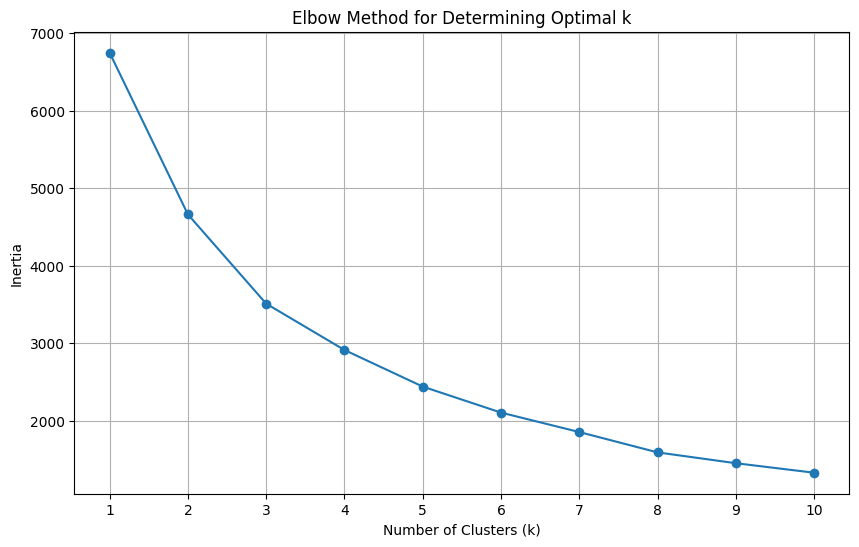

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

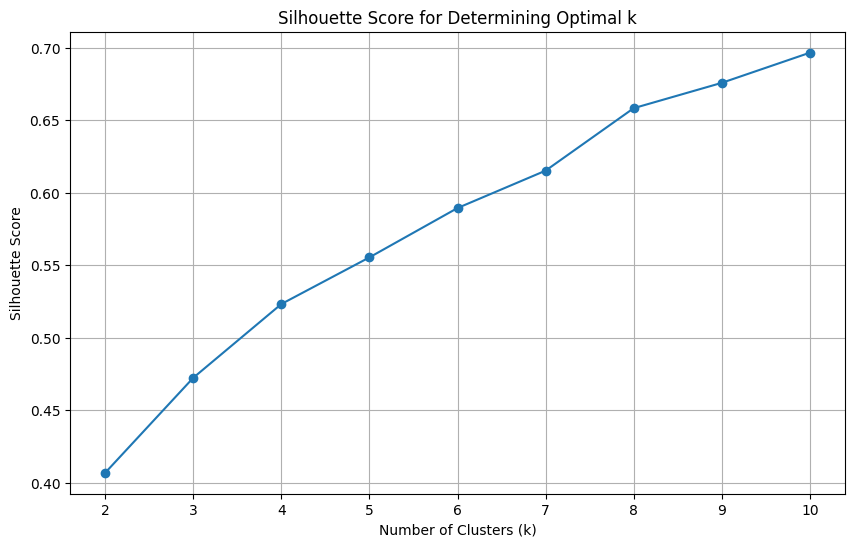

In [12]:
from sklearn.metrics import silhouette_score

# Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [13]:
X.head()

,one-on-one,ICT,video,small_group,large_group,none
481056,0.0,0.0,0.0,0.0,0.0,1.0
481057,0.0,0.0,0.0,0.0,1.0,0.0
481058,0.0,0.0,0.0,0.0,0.0,1.0
481059,0.0,0.0,1.0,0.0,0.0,1.0
481060,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10,algorithm="lloyd")  # Adjust the number of clusters as needed
kmeans.fit(X)
clusters = kmeans.labels_

In [15]:
X['Cluster'] = clusters

C:\Users\borbr\AppData\Local\Temp\ipykernel_9688\3002481503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


In [16]:
# Viewing the mean values of each cluster
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)

         one-on-one       ICT     video  small_group  large_group      none
Cluster                                                                    
0          0.251833  0.086675  0.180250     0.255282     0.075032  0.000000
1          0.021049  0.019135  0.034826     0.045542     0.017222  1.000000
2          0.690091  0.784961  0.879831     0.436402     0.281799  0.248067


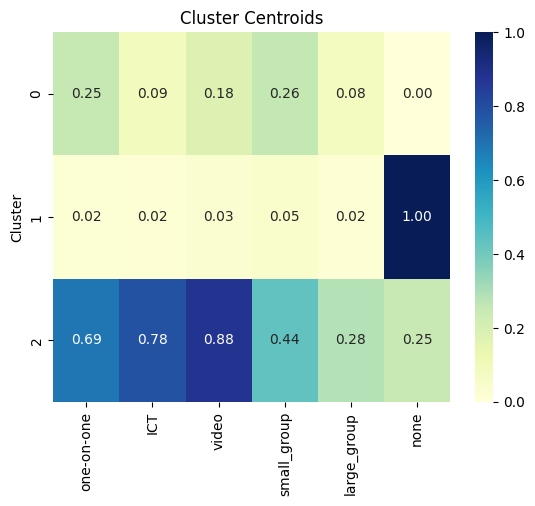

In [17]:
import seaborn as sns
# Heatmap of the cluster centroids
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Cluster Centroids')
plt.show()

In [18]:
# Define a new threshold for column prevalence
threshold = 0.3  # Example: lower the threshold to 0.3

# Iterate through each cluster
for cluster_label in X['Cluster'].unique():
    print("Cluster", cluster_label, "interpretation:")
    
    # Iterate through each column, excluding the 'Cluster' column
    for column in X.columns:
        if column != 'Cluster':
            column_mean = X[X['Cluster'] == cluster_label][column].mean()
            if column_mean > threshold:
                print(column, "is prevalent in this cluster.")
            else:
                print(column, "is not prevalent in this cluster.")
    print()

Cluster 1 interpretation:
one-on-one is not prevalent in this cluster.
ICT is not prevalent in this cluster.
video is not prevalent in this cluster.
small_group is not prevalent in this cluster.
large_group is not prevalent in this cluster.
none is prevalent in this cluster.

Cluster 0 interpretation:
one-on-one is not prevalent in this cluster.
ICT is not prevalent in this cluster.
video is not prevalent in this cluster.
small_group is not prevalent in this cluster.
large_group is not prevalent in this cluster.
none is not prevalent in this cluster.

Cluster 2 interpretation:
one-on-one is prevalent in this cluster.
ICT is prevalent in this cluster.
video is prevalent in this cluster.
small_group is prevalent in this cluster.
large_group is not prevalent in this cluster.
none is not prevalent in this cluster.



In [22]:
print(len(X.index))
cluster_counts = X['Cluster'].value_counts()
print("Number of values in each cluster:")
print(cluster_counts)

6355
Number of values in each cluster:
Cluster
1    2613
0    2319
2    1423
Name: count, dtype: int64


In [25]:
df['Cluster'] = clusters

In [26]:
df.head()

,one-on-one,ICT,video,small_group,large_group,none,spol,letnik,Cluster
481056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1
481057,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.0,0
481058,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0,1
481059,0.0,0.0,1.0,0.0,0.0,1.0,2.0,10.0,1
481060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0


In [27]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Cluster'], df['spol'])

print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and cluster membership.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between gender and cluster membership.")

Contingency Table:
spol      1.0   2.0
Cluster            
0        1028  1291
1        1219  1394
2         752   671

Chi-square test statistic: 26.185725962446845
P-value: 2.0598796870286213e-06
Degrees of freedom: 2
Expected frequencies:
[[1094.36365067 1224.63634933]
 [1233.10574351 1379.89425649]
 [ 671.53060582  751.46939418]]
Reject the null hypothesis: There is a significant association between gender and cluster membership.
